In [54]:
import uproot
from pathlib import Path
import numpy as np
import pandas as pd 

In [2]:
rootfile = uproot.open("./Figure6c.root")

In [38]:
WZ_SR_histname_dict = {
    "data" : "Hist1D_y1",
    "Fake" : "Hist1D_y2",
    "ZZ" : "Hist1D_y3",
    "VVV" : "Hist1D_y4",
    "WZEWK" : "Hist1D_y5",
    "WZQCD" : "Hist1D_y6",
    "BKG_TOT" : "Hist1D_y7",
}

In [39]:
WZ_SR_hist_dict = dict.fromkeys(WZ_SR_histname_dict.keys())

In [52]:
for data_type, hist_name in WZ_SR_histname_dict.items():
    hist = rootfile['Table 2'][hist_name].to_hist()
    hist.variances()[:] = rootfile['Table 2'][f'{hist_name}_e1'].to_numpy()[0]
    print(f"{data_type} : {hist.values().sum()}")
    WZ_SR_hist_dict[data_type] = hist

data : 71.86111128330231
Fake : 0.3603630007892207
ZZ : 6.219691976904869
VVV : 0.86284498590976
WZEWK : 25.963776782155037
WZQCD : 32.551023706793785
BKG_TOT : 65.95770508050919


In [55]:
m_WZ_bin_SR_edges = np.array([150, 200, 230, 270, 310, 350, 390, 480, 660, 1200])
m_WZ_bin_SR_binwidth = np.diff(m_WZ_bin_SR_edges)

In [59]:
WZ_SR_hist_dict['data'] / 50 * m_WZ_bin_SR_binwidth

Hist(Variable([150, 200, 230, 270, 310, 350, 390, 480, 660, 1200], name='xaxis', label='mWZ [GeV]'), storage=Weight()) # Sum: WeightedSum(value=66, variance=44.8587)

In [60]:
WZ_SR_hist_prenorm_dict = dict.fromkeys(WZ_SR_hist_dict.keys())
for data_type, hist in WZ_SR_hist_dict.items():
    WZ_SR_hist_prenorm_dict[data_type] = hist / 50 * m_WZ_bin_SR_binwidth

In [61]:
WZ_SR_hist_prenorm_dict

{'data': Hist(Variable([150, 200, 230, 270, 310, 350, 390, 480, 660, 1200], name='xaxis', label='mWZ [GeV]'), storage=Weight()) # Sum: WeightedSum(value=66, variance=44.8587),
 'Fake': Hist(Variable([150, 200, 230, 270, 310, 350, 390, 480, 660, 1200], name='xaxis', label='mWZ [GeV]'), storage=Weight()) # Sum: WeightedSum(value=0.288286, variance=1.41132),
 'ZZ': Hist(Variable([150, 200, 230, 270, 310, 350, 390, 480, 660, 1200], name='xaxis', label='mWZ [GeV]'), storage=Weight()) # Sum: WeightedSum(value=5.18397, variance=10.0959),
 'VVV': Hist(Variable([150, 200, 230, 270, 310, 350, 390, 480, 660, 1200], name='xaxis', label='mWZ [GeV]'), storage=Weight()) # Sum: WeightedSum(value=0.861834, variance=5.65373),
 'WZEWK': Hist(Variable([150, 200, 230, 270, 310, 350, 390, 480, 660, 1200], name='xaxis', label='mWZ [GeV]'), storage=Weight()) # Sum: WeightedSum(value=26.0735, variance=32.5901),
 'WZQCD': Hist(Variable([150, 200, 230, 270, 310, 350, 390, 480, 660, 1200], name='xaxis', label='mW

In [67]:
WZ_SR_hist_prenorm_dict['WZQCD'].sum()

WeightedSum(value=28.7351, variance=26.3099)

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f322a696800>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

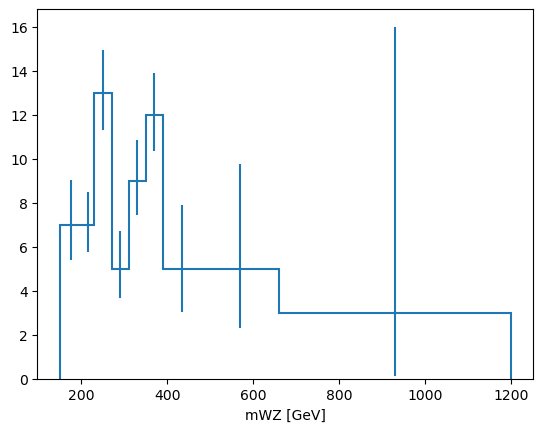

In [68]:
WZ_SR_hist_prenorm_dict['data'].plot()